# Question 1

In [1]:
# Necassary imports
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# QUESTION 1
print('QUESTION 1\n')

# PART B
print('PART B\n')

QUESTION 1

PART B



In [3]:
# Constants
TAU_M = 10e-3 # 10 milli seconds
R = 1e3 # 1 kilo ohm
I_0 = 2e-3 # 2 milli ampere
TIME_INTERVAL = (0, 100e-3) # 0 to 100 milli seconds
NUM_STEPS = 10000 # number of bins in the time interval
H = (TIME_INTERVAL[1] - TIME_INTERVAL[0]) / NUM_STEPS # step_size

In [4]:
v_numerical = np.zeros(NUM_STEPS) # in volts
t = np.zeros(NUM_STEPS) # in seconds

# Computing values in the first order difference equation
for i in range(0, NUM_STEPS - 1):
    v_numerical[i + 1] = ((TAU_M - H) * v_numerical[i] + H * R * I_0) / TAU_M
    t[i + 1] = (i + 1) * H

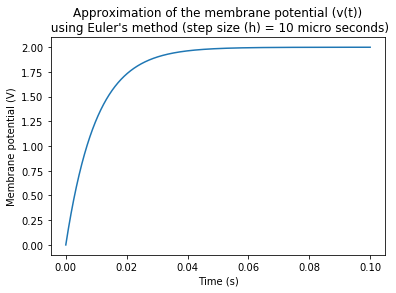

In [5]:
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.plot(t, v_numerical)
plt.title('Approximation of the membrane potential (v(t))'
          '\n using Euler\'s method (step size (h) = 10 micro seconds)')
plt.ylabel('Membrane potential (V)')
plt.xlabel('Time (s)')
plt.show(block=False)

In [6]:
def analytical_solution(t):
    """
    Given a time value, computes and returns the value of 
    membrane potential calculated using the analylitical 
    solution of the model involving the differential equation.
    (Uses globally defined constants)
    Args:
        t: The specified time value
    Returns:
        v(t): The membrane potential calculated according
            to the analytical solution.
    """
    return R * I_0 * (1 - np.exp(-t / TAU_M))

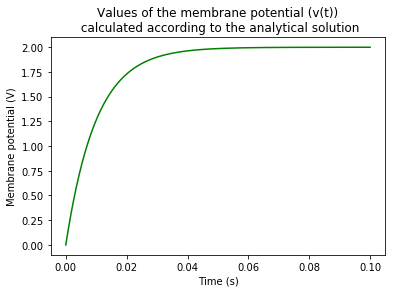

In [7]:
v_analytical = analytical_solution(t)

plt.figure(figure_num)
figure_num += 1
plt.plot(t, v_analytical, color='green')
plt.title('Values of the membrane potential (v(t))'
          '\n calculated according to the analytical solution')
plt.ylabel('Membrane potential (V)')
plt.xlabel('Time (s)')
plt.show(block=False)

In [8]:
MSE = np.sum((v_analytical - v_numerical) ** 2) / NUM_STEPS
print('Mean Squared Error (MSE) of the numerical approximation: %.2g' % MSE)

Mean Squared Error (MSE) of the numerical approximation: 2.5e-08


In [9]:
# PART C
print('PART C\n')

PART C



In [10]:
# Constants
THETA = 1 # a threshold value of 1 V
V_RESET = 0 # the reset voltage value

v_threshold_numerical = np.zeros(NUM_STEPS) # in volts

# Computing values in the first order difference equation
for i in range(0, NUM_STEPS - 1):
    voltage = ((TAU_M - H) * v_threshold_numerical[i] + H * R * I_0) / TAU_M
    v_threshold_numerical[i + 1] = V_RESET if voltage >= THETA else voltage

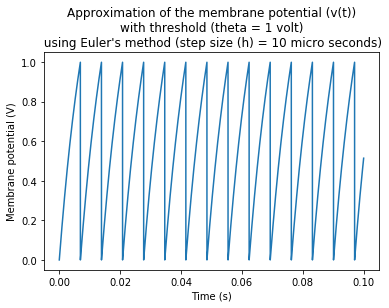

In [11]:
plt.figure(figure_num)
figure_num += 1
plt.plot(t, v_threshold_numerical)
plt.title('Approximation of the membrane potential (v(t))'
          '\nwith threshold (theta = 1 volt)'
          '\n using Euler\'s method (step size (h) = 10 micro seconds)')
plt.ylabel('Membrane potential (V)')
plt.xlabel('Time (s)')
plt.show(block=False)

In [12]:
v_threshold_analytical = np.zeros(NUM_STEPS) # in volts
t_threshold = np.array(t)

for i in range(NUM_STEPS):
    voltage = analytical_solution(t_threshold[i])
    if voltage >= THETA:
        t_threshold[i:] -= t_threshold[i]
        voltage = analytical_solution(t_threshold[i])
    v_threshold_analytical[i] = voltage

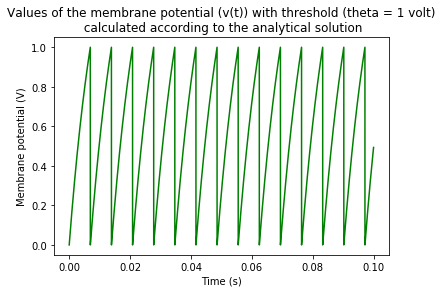

In [13]:
plt.figure(figure_num)
figure_num += 1
plt.plot(t, v_threshold_analytical, color='green')
plt.title('Values of the membrane potential (v(t)) with threshold (theta'
          ' = 1 volt)\n calculated according to the analytical solution')
plt.ylabel('Membrane potential (V)')
plt.xlabel('Time (s)')
plt.show(block=False)

In [14]:
MSE = np.sum((v_threshold_analytical - v_threshold_numerical) ** 2) / NUM_STEPS
print('Mean Squared Error (MSE) of the numerical approximation ' 
      '(threshold case): %.2g' % MSE)

Mean Squared Error (MSE) of the numerical approximation (threshold case): 0.01


In [15]:
# PART D
print('PART D\n')

PART D



In [16]:
I_VALUES = np.arange(2e-3, 10e-3 + 1e-5, 1e-5) # current values in milli amperes

interspike_intervals = np.zeros(np.size(I_VALUES))

for i, I in enumerate(I_VALUES):
    v = np.zeros(NUM_STEPS)
    for j in range(0, NUM_STEPS - 1):
        v[j + 1] = ((TAU_M - H) * v[j] + H * R * I) / TAU_M
        if v[j + 1] >= THETA:
            interspike_intervals[i] = (j + 1) * H
            break

firing_rates = 1 / interspike_intervals

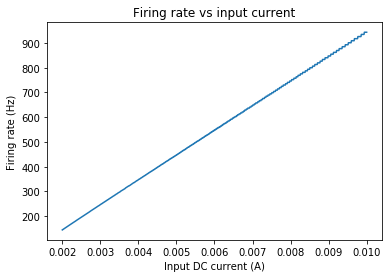

In [17]:
plt.figure(figure_num)
figure_num += 1
plt.plot(I_VALUES, firing_rates)
plt.title('Firing rate vs input current')
plt.xlabel('Input DC current (A)')
plt.ylabel('Firing rate (Hz)')
plt.show(block=False)

In [18]:
# PART E
print('PART E\n')

PART E



In [19]:
# Constants
GAUSSIAN_MEAN = 0 
GAUSSIAN_STD = 4e-3 # 4 milli amperes
NUM_STEPS = 2000
H = (TIME_INTERVAL[1] - TIME_INTERVAL[0]) / NUM_STEPS

v_noisy = np.zeros(NUM_STEPS) # in volts
t_noisy = np.zeros(NUM_STEPS)
np.random.seed(7) # set the seed to be able to recover the results

# Computing values in the first order difference equation
for i in range(0, NUM_STEPS - 1):
    noise =  GAUSSIAN_STD * np.random.randn() + GAUSSIAN_MEAN
    voltage = ((TAU_M - H) * v_noisy[i] + H * R * (I_0 + noise)) / TAU_M
    v_noisy[i + 1] = V_RESET if voltage >= THETA else voltage
    t_noisy[i + 1] = (i + 1) * H

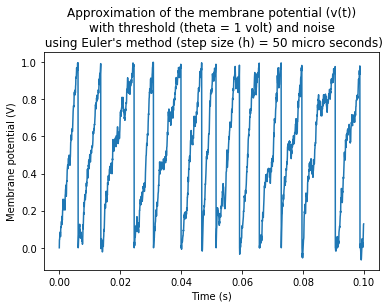

In [20]:
plt.figure(figure_num)
figure_num += 1
plt.plot(t_noisy, v_noisy)
plt.title('Approximation of the membrane potential (v(t))'
          '\nwith threshold (theta = 1 volt) and noise'
          '\n using Euler\'s method (step size (h) = 50 micro seconds)')
plt.ylabel('Membrane potential (V)')
plt.xlabel('Time (s)')
plt.show(block=False)

In [21]:
last_pair = (0, 0)
interspike_intervals = np.zeros(np.size(I_VALUES))

for i, I in enumerate(I_VALUES):
    intervals = [] # holds the individual interspike intervals 
    for j in range(0, NUM_STEPS - 1):
        noise = GAUSSIAN_STD * np.random.rand() + GAUSSIAN_MEAN
        v_noisy[j + 1] = ((TAU_M - H) * v_noisy[j] + H * R * (I + noise)) / TAU_M
        if v_noisy[j + 1] >= THETA:
            v_noisy[j + 1] = V_RESET
            interval = (j + 1) * H
            # subtract the end point of the previous time interval if needed
            if last_pair[0] == i: 
                interval -= last_pair[1]
            last_pair = (i, ((j + 1) * H))
            intervals.append(interval)
    interspike_intervals[i] = np.mean(interval) # average interspike interval 
    
firing_rates_noisy = 1 / interspike_intervals

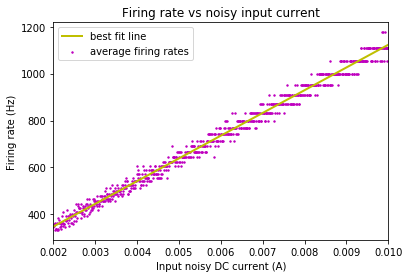

In [22]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(I_VALUES, firing_rates_noisy, 
            s=2, color='m', label='average firing rates')
plt.plot(I_VALUES, np.poly1d(np.polyfit(I_VALUES, firing_rates_noisy, 1))
         (I_VALUES), color='y', linewidth=2, label='best fit line')
plt.legend()
plt.title('Firing rate vs noisy input current')
plt.xlabel('Input noisy DC current (A)')
plt.ylabel('Firing rate (Hz)')
x1, x2, y1, y2 = plt.axis()
plt.axis((2e-3, 10e-3, y1, y2))
plt.show(block=False)

In [23]:
plt.show()